# Vectors and orientations

*March 2018, June 2019, Mauro Alberti*

*Last version: 2021-04-24*

*Last running version: 2021-05-22*

Developement code:

In [1]:
%load_ext autoreload
%autoreload 1

## 1. Introduction

Since we will plot geometric data into stereonets, prior to any other operation, we import *mplstereonet* and run the IPython command *%matplotlib inline*, that allows to incorporate Matplotlib plots in the Jupyter notebook.

In [2]:
%matplotlib inline

After that, we import the *splot* function from the *plotting.stereonets* module.

In [3]:
from pygsf.geology.stereonets.plot import splot

## 2. Cartesian vectors

Cartesian vectors represent the base to analytically process orientational data, such as lineations and planes.

The reference axis orientations used in *pygsf* are the *x* axis parallel to East, *y* parallel to North and *z* vertical, upward-directed. 

To use vectors, we import the submodule:

In [4]:
from pygsf.mathematics.vectors3d import *

Vectors can be created by providing their Cartesian components:

In [5]:
v1, v2 = Vect3D(3.1, 7.2, 5.6), Vect3D(4.2, 9.17, 8.0)

Vectors addition and subtraction are expressed with the usual operators:

In [6]:
v1 + v2  # vector addition

Vect3D(7.3000, 16.3700, 13.6000)

In [7]:
v1 - v2  # vector subtraction

Vect3D(-1.1000, -1.9700, -2.4000)

Scalar and vector products are obtained with the methods:

In [8]:
v1.dot_product(v2)  # scalar product

123.844

In [9]:
 v1.cross_product(v2)  # vector product

Vect3D(6.2480, -1.2800, -1.8130)

The angle (in degrees) between two vectors can be derived:

In [10]:
v1.angle_as_degrees(v2)  # angle in degrees bwtween two Cartesian vectors

3.0646173501805807

## 3. Orientations

Orientations can refer to linear or planar features. When referring to linear orientations, we subdivide them into *directional*, with a defined direction, or *axial*, without direction. 

We import all classes/methods from the orientations sub-module:

In [11]:
from pygsf.orientations.orientations import *

A *Direct* is equivalent to a unit vector in the 3D space, with orientation expressed by polar coordinates: a direction defined by a trend (from the North, 0°-360°) and a plunge (-90° to 90°, where positive values are downward-directed while negative ones are upward-directed):

In [12]:
or1 = Direct(130, 10)  # orientation defined by its trend and plunge. Pointing downward, since positive plunge.
or2 = Direct(312, -45)  # or2 points upwards, since it has a negative plunge
or3 = Direct(300, -20)  # as or2

We can plot geological vectors in a stereoplot. As previously said, we need to have imported the *mplstereonet* module, as well as run the *%matplotlib inline* command. 

We can plot using the *splot* function. The data to plot have to be inserted into a list.

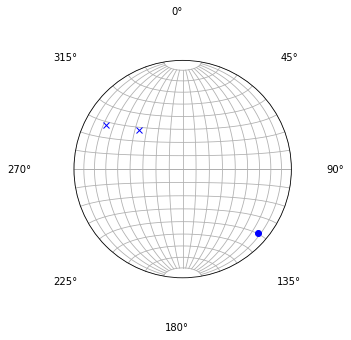

In [13]:
splot([or1, or2, or3]) # we provide the function arguments in a list

Note the default color, as well the default symbol used for upward-pointing geological vectors, different from the one for downward-pointing geological vectors.

We can customize the colors/symbols used for certain values, by inserting them into round brackets (i.e., creating Python tuples) and adding **at the end** of the tuple a string defining the color "*c=xxx*" and/or the marker: "*m=x*", where color and marker names are those standard for Matplotlib. See example below:

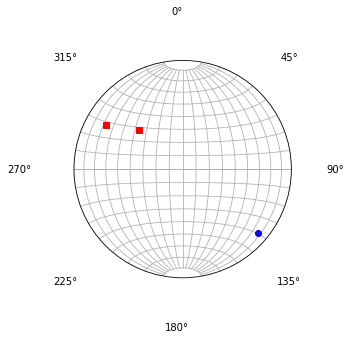

In [14]:
splot([or1, (or2, or3, "m=s,c=red")])  # gv2 and gv3 are customized. "s" stands for "square"

If we want to force all measures to plot in the upper, or lower hemisphere, instead of plotting with their original orientations, we can use, after the data list, the keyword *force*, setting it to *force='upper'* or *force='lower'*.

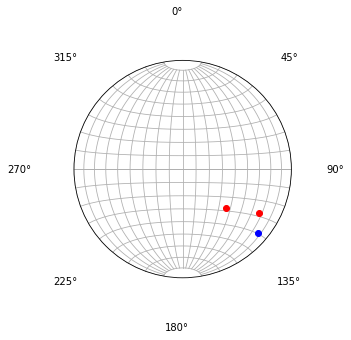

In [15]:
splot([or1, (or2, or3, "m=o, c=red")], force='lower')  # "o" means circle

It is possible to check if a geological vector is subhorizontal or subvertical:

In [16]:
Direct(130, 4).is_sub_horizontal()

True

In [17]:
Direct(110, 88).is_sub_vertical()

True

The default dip angle threshold for subhorizontal and subvertical faults is 5°, so in the previous examples geological vectors are considered to be respectively subhorizontal and subvertical.

As for the Cartesian vectors, we can calculate the angle between two geological vectors:

In [18]:
or1.angle_as_degrees(or2)

144.95764747690035

Since geological vectors are oriented, the angle range is from 0° to 180°.

We can check if two geological vectors are parallel, anti-parallel or sub-orthogonal:

In [19]:
or2.is_sub_parallel(or3)

False

In [20]:
Direct(90, 10).is_sub_parallel(Direct(270, -10.5))

False

In [21]:
Direct(90, 0).is_sub_orthogonal(Direct(0, 89.5))

True

We calculate and plot the vector normal to two geological vectors:

In [22]:
norm_or = or2.normal_direction(or3)  # orientation normal to or2 and or3

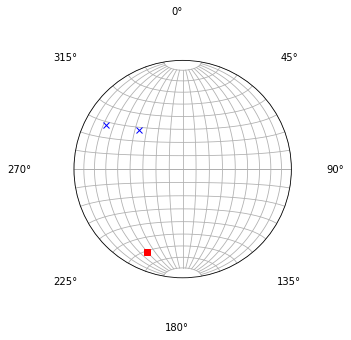

In [23]:
splot([or2, or3, (norm_or, "m=s,c=red")])

We check that the two source geological vectors are normal to the calculated one:

In [24]:
or2.angle_as_degrees(norm_or), or3.angle_as_degrees(norm_or)

(90.00000000000003, 90.00000000000003)

### 2.3 Polar axes

*Polar axes* are similar to directions (in fact they *inherit* from the *Direct* class), but do not have a specific direction, i.e., they have only an orientation. As for orientations, they are defined by a trend and a plunge, but the two possible, opposite directions are both considered in the calculations (e.g., the angles between axes).

We can create an axis given its trend and plunge values, or alternatively converting to an axis from an orientation: 

In [25]:
ax1 = Axis(130, 10)  # creating a geological axis given trend and plunge (same as previous gv1)
ax2 = Axis.from_direction(or2)  # converting the geological vector to a geological axis

In [26]:
print(ax1, ax2) 

Axis(az: 130.00°, pl: 10.00°) Axis(az: 312.00°, pl: -45.00°)


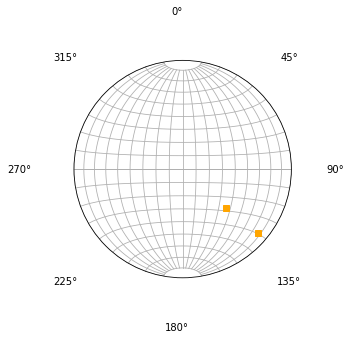

In [27]:
splot([ax1, ax2])  # note that we provide the arguments inside a list

Since GAxis instances are inherently bi-directional, when plotting in stereonets upward-pointing cases are automatically converted to their equivalent, downward-pointing cases, unless explicitely forced to be projected in the upper hemisphere:

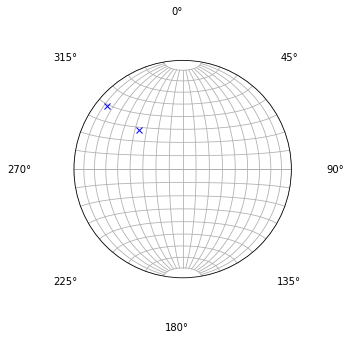

In [28]:
splot([(ax1, ax2, "c=blue,m=x")], force="upper")

Their original, stored value is not modified. 

The difference between orientations and axes is evident for instance in the calculation of the angle between two orientations or two axes:

In [29]:
or_angle = or1.angle_as_degrees(or2)  # angle (in degrees) between two geological vectors 

In [30]:
print(or_angle)

144.95764747690035


We convert the geological vectors to axes and then calculate the angle:

In [31]:
ax1, ax2 = Axis.from_direction(or1), Axis.from_direction(or2)
axis_angle = ax1.angle_as_degrees(ax2)  # angle (in degrees) between two geological axes

In [32]:
print(axis_angle)

35.04235252309965


The angle between the two axes is the complement to 180° of the angle between the two geological vectors.

### 2.4 Planes

A *plane* has orientations expressed by the azimuth (from the geographic) North of its strike or dip direction, and by the dip angle. The default in *pygsf* is to use the dip direction.

In [33]:
pl1 = Plane(112, 67)  # dip direction and dip angle input

In [34]:
print(pl1)

Plane(112.00, +67.00)


It is however possible to define a geological plane providing the right-hand rule strike, instead of the dip direction:

In [35]:
pl2 = Plane(24, 56, is_rhr_strike=True)  # RHR strike and dip angle inputs

In [36]:
print(pl2)  # output is always expressed as dip direction and dip angle

Plane(114.00, +56.00)


We plot the two planes in the default (lower) emisphere:

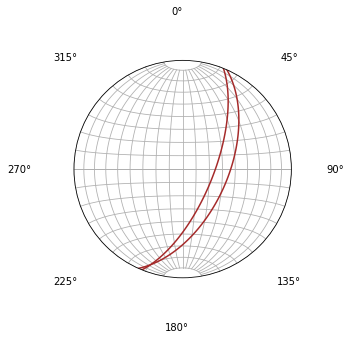

In [37]:
splot([(pl1, pl2, "c=brown")])

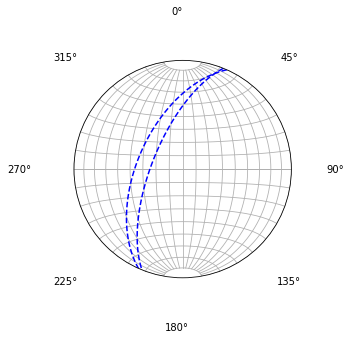

In [38]:
splot([pl1, pl2], force="upper")  # note in the plot the default line color and dashing are usde

The orientation normal to a plane is calculated as in this example:

In [39]:
norm_or = pl1.normal_direction()

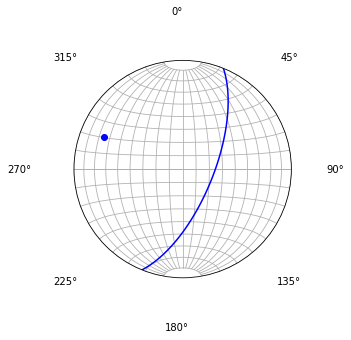

In [40]:
splot([pl1, norm_or])

It is possible to derive the plane that is common to two orientations (or axes):

In [41]:
plane = or2.common_plane(or3)  # geological plane common to two geological vectors

We plot the three geological measures:

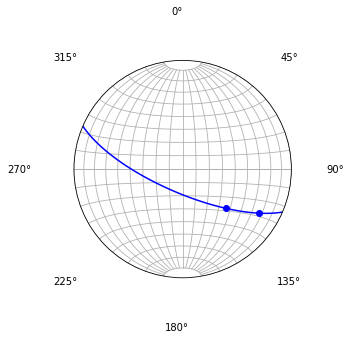

In [42]:
splot([or2, or3, plane], force="lower")

Considering just a single geological vector, the geological plane normal to the vector is obtained as follows:

In [43]:
norm_pl = or1.normal_plane()  # geological plane normal to a given geological vector

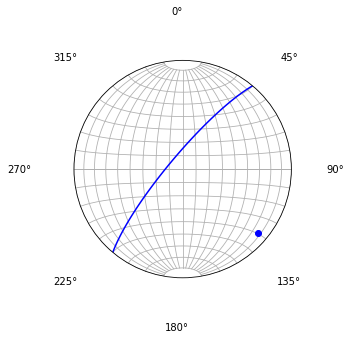

In [44]:
splot([or1, norm_pl])